In [1]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import numpy as np
from keras import backend as K
import tensorflow as tf
from keras.models import load_model
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix
import numpy as np
from keras import backend as K
import tensorflow as tf
from sklearn.inspection import permutation_importance
#import dill


**Load the dataset**

In [43]:
multiclass_test = pd.read_csv(r'C:\Users\Fra\Documents\SDS\SML\DATASET PROGETTO\multiclass_test_no_weird_obs.csv',header= 0)
multiclass_training = pd.read_csv(r'C:\Users\Fra\Documents\SDS\SML\DATASET PROGETTO\multiclass_training_no_weird_obs.csv', header= 0)

In [44]:
multiclass_test

,Unnamed: 0,DepMap_ID,A1BG..1.,A1CF..29974.,A2M..2.,A2ML1..144568.,A3GALT2..127550.,A4GALT..53947.,A4GNT..51146.,AAAS..8086.,...,ZWINT..11130.,ZXDA..7789.,ZXDB..158586.,ZXDC..79364.,ZYG11A..440590.,ZYG11B..79699.,ZYX..7791.,ZZEF1..23140.,ZZZ3..26009.,label
0,3,ACH-000005,0.074653,0.024448,0.019094,0.007517,0.038370,0.120430,0.008827,0.206887,...,0.195097,0.049115,0.034303,0.041229,0.091393,0.088391,0.020917,0.035469,0.073934,6
1,5,ACH-000009,0.042667,0.050918,0.015425,0.013461,0.025152,0.074668,0.037041,0.174388,...,0.417735,0.029430,0.003645,0.053849,0.118411,0.410616,0.034562,0.068021,0.237540,0
2,7,ACH-000012,0.116891,0.016414,0.002584,0.001259,0.006843,0.198696,0.002273,0.162922,...,0.960272,0.011820,0.023760,0.011905,0.008734,0.039195,0.066350,0.042229,0.396633,8
3,14,ACH-000022,0.033179,0.009500,0.005520,0.041548,0.072657,0.029613,0.019009,0.052439,...,0.205466,0.018421,0.012871,0.020502,0.009225,0.029040,0.008182,0.037064,0.259274,0
4,17,ACH-000025,0.099894,0.136329,0.031623,0.007211,0.030127,0.064356,0.084561,0.431292,...,0.815988,0.009664,0.006521,0.193002,0.034718,0.146196,0.044357,0.136430,0.362707,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,961,ACH-002179,0.009292,0.121023,0.024080,0.010902,0.057971,0.016577,0.005306,0.108376,...,0.732963,0.029505,0.025392,0.082016,0.013762,0.076785,0.078351,0.020766,0.057033,4
198,965,ACH-002189,0.030600,0.145788,0.028736,0.015012,0.266235,0.087155,0.037954,0.293759,...,0.926471,0.018855,0.028245,0.050957,0.086414,0.058429,0.029212,0.182511,0.306519,7
199,973,ACH-002233,0.040908,0.157980,0.040700,0.021461,0.035952,0.034983,0.026855,0.025469,...,0.867237,0.009523,0.007963,0.022838,0.013805,0.098785,0.027551,0.110795,0.012364,0
200,984,ACH-002269,0.015041,0.014318,0.006952,0.010000,0.070077,0.053019,0.026913,0.696723,...,0.976871,0.003983,0.021423,0.016316,0.084211,0.219904,0.010928,0.082369,0.836066,3


In [45]:
y_test = pd.get_dummies(multiclass_test, columns = ['label']).iloc[:,17395:17404]
X_train = np.array(multiclass_training.drop(['label','Unnamed: 0','DepMap_ID'], axis = 1))
y_train = pd.get_dummies(multiclass_training, columns = ['label']).iloc[:,17395:17404]
X_test = np.array(multiclass_test.drop(['label','DepMap_ID','Unnamed: 0'], axis = 1))

In [46]:
np.shape(X_test)

(202, 17393)

In [47]:
X_train_reshaped = X_train.reshape(805,17393)
X_test_reshaped = X_test.reshape(202,17393)

**First model**

In [10]:
model = Sequential()

model.add(Dense(200, input_shape=(17393,)))
model.add(Activation('relu'))
#model.add(Dropout(0.25))


model.add(Dense(9))
model.add(Activation('softmax'))
#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) #ottimizzatore che usa stochastic gradient , errore assoluto medio

early_stopping_monitor = EarlyStopping(patience= 5, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model0.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =30,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))

#in multiclass possiamo aggiungere la softmax come activation function in modo da aumentare la probabilità che solo
#un nodo di uscita venga scelto ogni volta
#se per caso due possibili risultati sono anche parzialmente sovrapponibili si usa come activation function sigmoid

Epoch 1/30
23/26 [=========================>....] - ETA: 0s - loss: 2.9882 - accuracy: 0.1726
Epoch 00001: saving model to best_model0.hdf5
26/26 [==============================] - 1s 23ms/step - loss: 2.9003 - accuracy: 0.1776 - val_loss: 1.9138 - val_accuracy: 0.3663
Epoch 2/30
22/26 [========================>.....] - ETA: 0s - loss: 1.7299 - accuracy: 0.4517
Epoch 00002: saving model to best_model0.hdf5
26/26 [==============================] - 0s 17ms/step - loss: 1.6988 - accuracy: 0.4658 - val_loss: 1.6880 - val_accuracy: 0.4653
Epoch 3/30
25/26 [===========================>..] - ETA: 0s - loss: 1.4320 - accuracy: 0.5525
Epoch 00003: saving model to best_model0.hdf5
26/26 [==============================] - 0s 17ms/step - loss: 1.4289 - accuracy: 0.5540 - val_loss: 1.5854 - val_accuracy: 0.4851
Epoch 4/30
25/26 [===========================>..] - ETA: 0s - loss: 1.2165 - accuracy: 0.6200
Epoch 00004: saving model to best_model0.hdf5
26/26 [==============================] - 0s 17ms/s

**More complex model: increase width and depth**

In [48]:
model = Sequential()

#1°layer
model.add(Dense(600, input_shape=(17393,)))
model.add(Activation('relu'))
#model.add(Dropout(0.25))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3°layer
model.add(Dense(9))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) #ottimizzatore che usa stochastic gradient , errore assoluto medio

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model1.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =30,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Epoch 1/30
25/26 [===========================>..] - ETA: 0s - loss: 3.3572 - accuracy: 0.1700
Epoch 00001: val_accuracy improved from -inf to 0.05941, saving model to best_model1.hdf5
26/26 [==============================] - 2s 52ms/step - loss: 3.3477 - accuracy: 0.1727 - val_loss: 2.4404 - val_accuracy: 0.0594
Epoch 2/30
25/26 [===========================>..] - ETA: 0s - loss: 1.9878 - accuracy: 0.2900
Epoch 00002: val_accuracy improved from 0.05941 to 0.25743, saving model to best_model1.hdf5
26/26 [==============================] - 1s 47ms/step - loss: 1.9827 - accuracy: 0.2919 - val_loss: 1.9589 - val_accuracy: 0.2574
Epoch 3/30
25/26 [===========================>..] - ETA: 0s - loss: 1.6054 - accuracy: 0.4550
Epoch 00003: val_accuracy improved from 0.25743 to 0.35644, saving model to best_model1.hdf5
26/26 [==============================] - 1s 48ms/step - loss: 1.6061 - accuracy: 0.4547 - val_loss: 1.6992 - val_accuracy: 0.3564
Epoch 4/30
25/26 [===========================>..] - 

**Performance on test**

In [52]:
#Create the vectors that contains the Cancers chosen (Cancer_Type2) and the one observed (Cancer_Type)
Cancer_Type = ["Gastrointestinal","Genitals","Muscle-Bone","Neuro","Breast","Head_Neck","Blood",
               "Genitourinary", "Lung"] 


- Eye: 0

- Gastrointestinal: 1

- Genitals: 2

- Muscle-Bone: 3

- Neuro: 4

- Breast: 5

- Head_Neck: 6

- Blood: 7

- Urinario: 8

- Lung: 9

In [53]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                fontsize = 15,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

In [54]:
best_model1 = load_model('best_model1.hdf5')
y_pred = np.argmax(best_model1.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred)
y_pred = y_pred.T.reindex(range(9)).T.fillna(0)

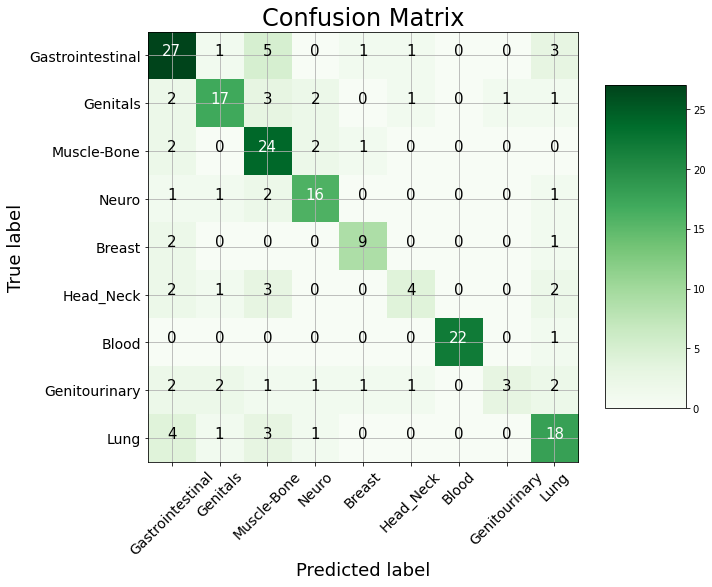

In [55]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

y_pred = np.argmax(best_model1.predict(X_test_reshaped),axis = 1)
y_test_confusion = multiclass_test.iloc[:,17395]

cm = confusion_matrix(y_test_confusion,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')


**Try the same but with focal loss**

![Focal loss](https://lh4.googleusercontent.com/_Zb8VyevBHbPdlPS1Bcph18b0GnRdY__yrSWaxEobHAOSq5izCVXdRS0Eo-26pU5Q8JE2daQAmFlwwUKnRiaf7JJrv7VJOLXbTOF-B6G8yshVWdBwhRXFBuMB5L6eH7KCTjzen-t7e39pxku5A)

In [56]:

def categorical_focal_loss(alpha, gamma=2.):
    """
    Softmax version of focal loss.
    When there is a skew between different categories/labels in your data set, you can try to apply this function as a
    loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy. Alpha is used to specify the weight of different
      categories/labels, the size of the array needs to be consistent with the number of classes.
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25]], gamma=2)], metrics=["accuracy"], optimizer=adam)
    """

    alpha = np.array(alpha, dtype=np.float32)

    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """
        y_true = tf.cast(y_true, tf.float32)
        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(K.sum(loss, axis=-1))

    return categorical_focal_loss_fixed

In [77]:
model = Sequential()

#1°layer
model.add(Dense(400, input_shape=(17393,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3°layer
model.add(Dense(9))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', metrics=['accuracy'], 
    loss=[categorical_focal_loss(alpha=[.25, .25, .25, .25, .25, .25, .25, .25, .25], gamma=2)])

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model_2.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =50,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Epoch 1/100
25/26 [===========================>..] - ETA: 0s - loss: 0.6972 - accuracy: 0.1500
Epoch 00001: val_accuracy improved from -inf to 0.18812, saving model to best_model_2.hdf5
26/26 [==============================] - 1s 38ms/step - loss: 0.6959 - accuracy: 0.1491 - val_loss: 0.4137 - val_accuracy: 0.1881
Epoch 2/100
25/26 [===========================>..] - ETA: 0s - loss: 0.3997 - accuracy: 0.2400
Epoch 00002: val_accuracy improved from 0.18812 to 0.36139, saving model to best_model_2.hdf5
26/26 [==============================] - 1s 33ms/step - loss: 0.3997 - accuracy: 0.2398 - val_loss: 0.3720 - val_accuracy: 0.3614
Epoch 3/100
24/26 [==========================>...] - ETA: 0s - loss: 0.3423 - accuracy: 0.3516
Epoch 00003: val_accuracy improved from 0.36139 to 0.37624, saving model to best_model_2.hdf5
26/26 [==============================] - 1s 34ms/step - loss: 0.3405 - accuracy: 0.3516 - val_loss: 0.3170 - val_accuracy: 0.3762
Epoch 4/100
24/26 [==========================>

In [78]:
best_model_2 = load_model('best_model_2.hdf5', compile=False)
y_pred = np.argmax(best_model_2.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred)
y_pred = y_pred.T.reindex(range(9)).T.fillna(0)

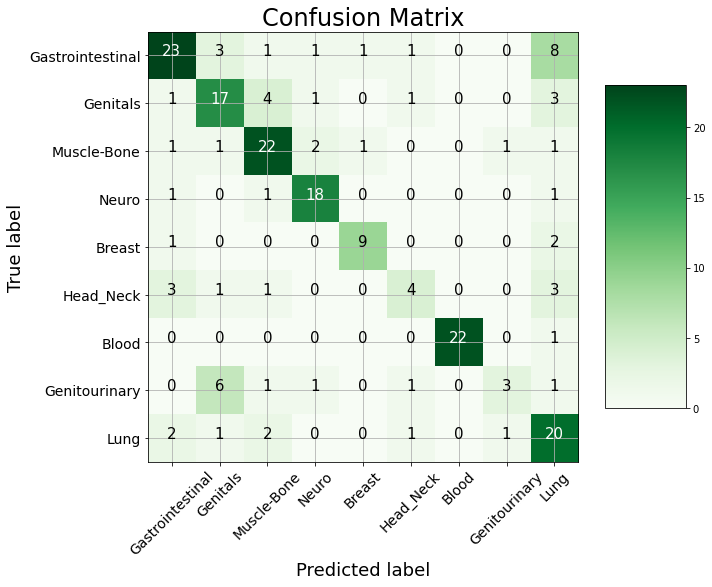

In [79]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

y_pred = np.argmax(best_model_2.predict(X_test_reshaped),axis = 1)
y_test_confusion = multiclass_test.iloc[:,17395]

cm = confusion_matrix(y_test_confusion,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')




**Try the same but adjust alpha paramter wrt class percentage**

In [62]:
n_obs = cm.sum(axis=1)
class_perc = n_obs/sum(n_obs)

In [82]:
model = Sequential()

#1°layer
model.add(Dense(500, input_shape=(17393,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.1))

#3°layer
model.add(Dense(9))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', metrics=['accuracy'], 
    loss=[categorical_focal_loss(alpha=class_perc, gamma=2)])

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model_3.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =50,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Epoch 1/50
25/26 [===========================>..] - ETA: 0s - loss: 0.4310 - accuracy: 0.1600
Epoch 00001: val_accuracy improved from -inf to 0.18812, saving model to best_model_3.hdf5
26/26 [==============================] - 2s 44ms/step - loss: 0.4296 - accuracy: 0.1615 - val_loss: 0.2047 - val_accuracy: 0.1881
Epoch 2/50
25/26 [===========================>..] - ETA: 0s - loss: 0.1801 - accuracy: 0.2750
Epoch 00002: val_accuracy improved from 0.18812 to 0.27228, saving model to best_model_3.hdf5
26/26 [==============================] - 1s 39ms/step - loss: 0.1794 - accuracy: 0.2783 - val_loss: 0.1682 - val_accuracy: 0.2723
Epoch 3/50
25/26 [===========================>..] - ETA: 0s - loss: 0.1391 - accuracy: 0.4013
Epoch 00003: val_accuracy improved from 0.27228 to 0.43564, saving model to best_model_3.hdf5
26/26 [==============================] - 1s 40ms/step - loss: 0.1389 - accuracy: 0.4012 - val_loss: 0.1333 - val_accuracy: 0.4356
Epoch 4/50
25/26 [===========================>..]

In [83]:
best_model_3 = load_model('best_model_3.hdf5', compile=False)
y_pred = np.argmax(best_model_3.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred)
y_pred = y_pred.T.reindex(range(9)).T.fillna(0)

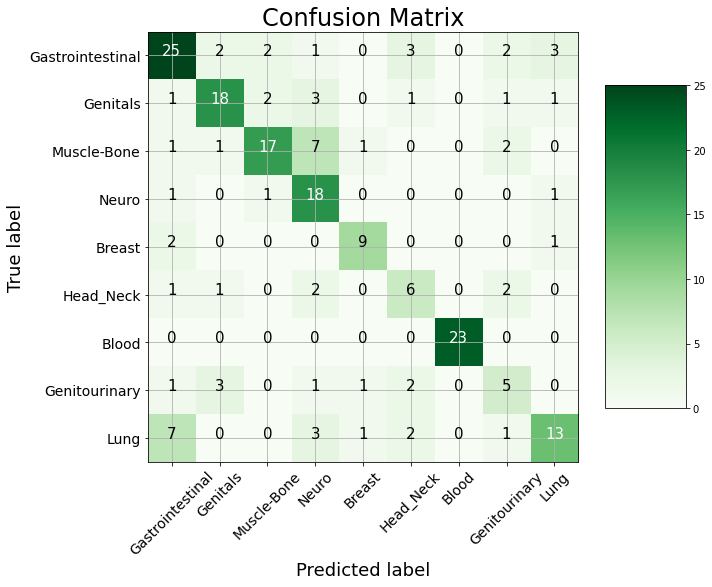

In [84]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

y_pred = np.argmax(best_model_3.predict(X_test_reshaped),axis = 1)
y_test_confusion = multiclass_test.iloc[:,17395]

cm = confusion_matrix(y_test_confusion,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')




No change at all :(

**Permutation importance first model**

In [47]:
results = permutation_importance(best_model, X_test, y_test, scoring='neg_mean_squared_error')
nn_importance = results.importances_mean

KeyboardInterrupt: 

In [ ]:
nn_importance[:120].plot.bar(figsize = (25, 10), color = 'r')
plt.title('Neural Network Feature Importance (Top 120)')
plt.xlabel('Features')
plt.show()